<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793654/blob/main/Actividad7_IBM(Mod_4_MD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
## Actividad 7
### Cursos de IBM
### Data Analysis With Python
### Modulo 4
##### Profesor: Jobish Vallikavungal Devassia
##### Profesor Tutor: Roberto Antonio Guevara González
##### Bernardo Mijangos Flores
##### Matricula A01793654
### Laboratorio 4

# Desarrollo del modelo

Objetivos:

Desarrollar modelos de predicción 

En esta sección, desarrollaremos varios modelos que predecirán el precio del automóvil utilizando las variables o características. Esto es solo una estimación, pero debería darnos una idea objetiva de cuánto debería costar el automóvil.

En el análisis de datos, a menudo usamos el desarrollo de modelos para ayudarnos a predecir futuras observaciones a partir de los datos que tenemos.

Un modelo nos ayudará a comprender la relación exacta entre diferentes variables y cómo se utilizan estas variables para predecir el resultado.

In [35]:
# Importamos la librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression   # para la regresion lineal

import seaborn as sns   # importamos el paquete de visualizacion seaborn
%matplotlib inline 

In [4]:
# obtenemos los datos del ejercicio del siguiente link

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [5]:
# obtenemos el dataframe con los datos

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 1. Regresión lineal y regresión lineal múltiple

## Regresión lineal simple

La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:

*   El predictor/variable independiente (X)
*   La respuesta/variable dependiente (que queremos predecir)(Y)

El resultado de la regresión lineal es una función lineal que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).

$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$

<b>Función lineal</b>
$$
Yhat = a + b  X
$$

*   se refiere a la intersección de la línea de regresión, en otras palabras: el valor de Y cuando X es 0
*   se refiere a la pendiente de la línea de regresión, en otras palabras: el valor con el que cambia Y cuando X aumenta en 1 unidad


In [9]:
# Creando la regresion lineal

lm = LinearRegression()
lm

LinearRegression()

Se requiere ver cómo highway-mpg puede ayudarnos a predecir el precio del automóvil. Usando una regresión lineal simple, Se crea una función lineal con "highway-mpg" como la variable predictora y el "price" como la variable de respuesta.

In [11]:
# asignamos la variable predictora y de respuesta en X y Y

X = df[['highway-mpg']]
Y = df['price']

In [12]:
# Ajuste el modelo lineal

lm.fit(X,Y)

LinearRegression()

In [13]:
# Generamos una prediccion

Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [14]:
# Valor del intercepto

lm.intercept_

38423.3058581574

In [15]:
# Valor de la pendiente

lm.coef_

array([-821.73337832])

Con los valores reales obtenemos:

Precio = 38423.31 - 821.73 x highway-mpg

# Pregunta 1a)

Cree un objeto de regresión lineal llamado "lm1".

In [16]:
lm1 = LinearRegression()
lm1

LinearRegression()

# Pregunta  1b):
¿Entrenar el modelo utilizando "engine-size" como variable independiente y "price" como variable dependiente?

In [17]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

# Pregunta 1c):

Encuentra la pendiente y el intercepto del modelo.

In [21]:
print('Pendiente',lm1.coef_)
print('Intercepto',lm1.intercept_)

Pendiente [[166.86001569]]
Intercepto [-7963.33890628]


# Pregunta 1d):

¿Cuál es la ecuación de la línea predicha? Puede usar x y yhat o  "engine-size" o "price".

In [26]:
Yhat=-7963.34 + 166.86*X

In [27]:
Price=-7963.34 + 166.86*df['engine-size']

# Regresión lineal múltiple

Para usar más variables en nuestro modelo para predecir el precio del automóvil, podemos usar la regresión lineal múltiple.

La regresión lineal múltiple es muy similar a la regresión lineal simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y dos o más variables predictoras (independientes).  La mayoría de los modelos de regresión del mundo real involucran múltiples predictores.


$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$

La ecuacion es:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


Otros buenos predictores de precio podrían ser:

*  Horsepower
*  Curb-weight
*  Engine-size
*  Highway-mpg

In [29]:
#  uso de estas variables como variables predictoras.

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [30]:
# Ajuste el modelo lineal utilizando las cuatro variables mencionadas.

lm.fit(Z, df['price'])

LinearRegression()

In [31]:
# Valor del intercepto

lm.intercept_

-15806.62462632922

In [32]:
# Valores de los coeficientes (b1, b2, b3, b4)

lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

La regresion lineal es:

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

# Pregunta 2a):

Cree y entrene un modelo de regresión lineal múltiple "lm2" en el que la variable de respuesta sea "precio" y la variable de predicción sea "normalized-losses" y "highway-mpg".

In [33]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

# Pregunta 2b):

Encuentre el coeficiente del modelo

In [34]:
lm2.coef_

array([   1.49789586, -820.45434016])

# 2. Model Evaluation Using Visualization

## Gráfico de regresión

Este gráfico mostrará una combinación de puntos de datos dispersos (un gráfico de dispersión), así como la línea de regresión lineal ajustada que pasa por los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).

Visualicemos highway-mpg  como una posible variable predictora del price:

(0.0, 48176.897279695775)

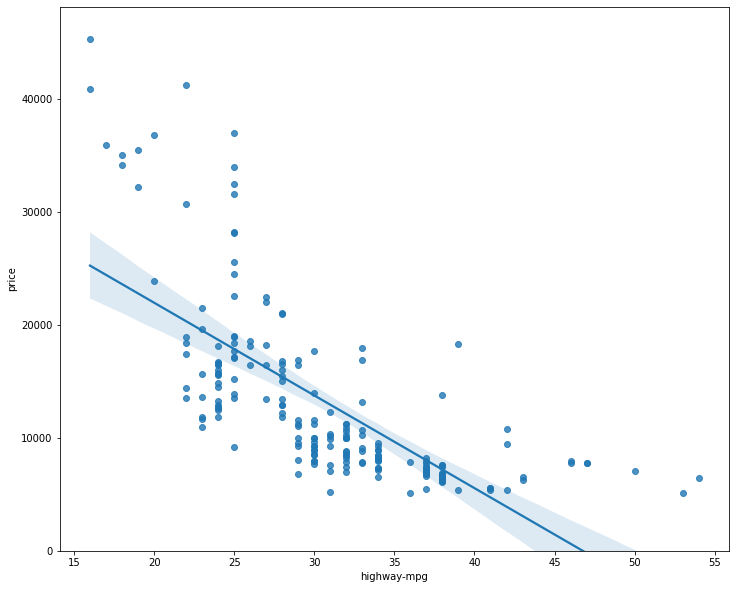

In [36]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

En este gráfico se observa que "price" está negativamente correlacionado con el highway-mpg ya que la pendiente de regresión es negativa.

Una cosa a tener en cuenta al mirar un gráfico de regresión es prestar atención a cuán dispersos están los puntos de datos alrededor de la línea de regresión. 

Esto le dará una buena indicación de la variación de los datos y si un modelo lineal sería el mejor ajuste o no. Si los datos están demasiado alejados de la línea, este modelo lineal podría no ser el mejor modelo para estos datos.

Comparemos este gráfico con el gráfico de regresión de "peak-rpm".

(0.0, 47414.1)

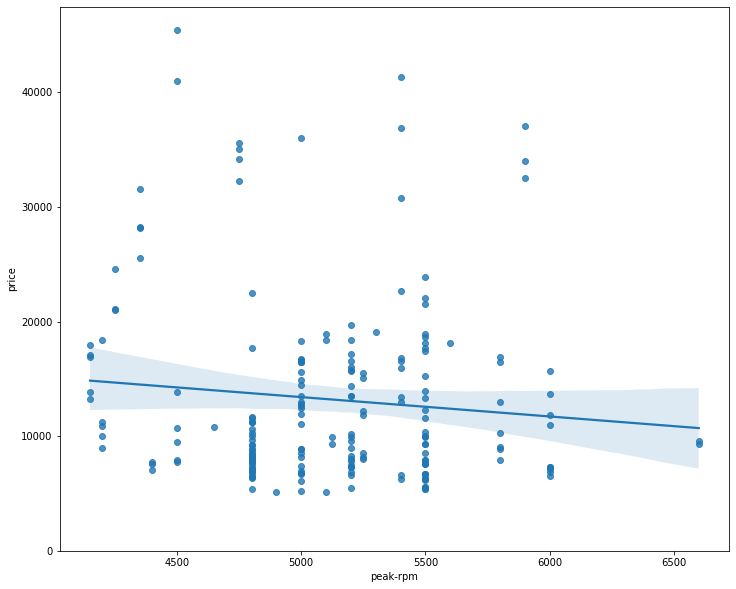

In [37]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Al comparar ambos gráficos de regresión vemos que los puntos para "highway-mpg" están mucho más cerca de la línea generada y en promedio disminuyen.

Los puntos de "peak-rpm" están más dispersos alrededor de la línea predicha y es mucho más difícil determinar si los puntos disminuyen o aumentan a medida que aumenta el "peak-rpm".

# Pregunta 3:

Dadas las gráficas de regresión anteriores, ¿las "peak-rpm " o "highway-mpg" están más fuertemente correlacionadas con "price"?

Usa el método ".corr()" para verificar tu respuesta.

In [38]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


La variable "highway-mpg" tiene una correlación más fuerte con "price", es aproximadamente -0.704692 en comparación con "peak-rpm", que es aproximadamente -0.101616.